In [1]:
#import dependencies
import numpy as np 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from astropy.time import Time

In [2]:
#read in early time photometry data txt files from sne.space
iPTF13bvn = pd.read_csv('sne_space_photometry_data/iPTF13bvn_photometry.txt')
SN1994I = pd.read_csv('sne_space_photometry_data/SN1994I_photometry.txt')
SN2002ap = pd.read_csv('sne_space_photometry_data/SN2002ap_photometry.txt')
SN2004gq = pd.read_csv('sne_space_photometry_data/SN2004gq_photometry.txt')
SN2006aj = pd.read_csv('sne_space_photometry_data/SN2006aj_photometry.txt')
SN2007uy = pd.read_csv('sne_space_photometry_data/SN2007uy_photometry.txt')
SN2008D = pd.read_csv('sne_space_photometry_data/SN2008D_photometry.txt')
SN1993J = pd.read_csv('sne_space_photometry_data/SN1993J_photometry.txt')
SN1996cb = pd.read_csv('sne_space_photometry_data/SN1996cb_photometry.txt')
SN2003bg = pd.read_csv('sne_space_photometry_data/SN2003bg_photometry.txt')
SN2005bf = pd.read_csv('sne_space_photometry_data/SN2005bf_photometry.txt')
SN2007gr = pd.read_csv('sne_space_photometry_data/SN2007gr_photometry.txt')
SN2008ax = pd.read_csv('sne_space_photometry_data/SN2008ax_photometry.txt')
SN2011hs = pd.read_csv('sne_space_photometry_data/SN2011hs_photometry.txt')

In [3]:
#read in late time photometry data csv files
iPTF13bvn_lt = pd.read_csv('phot_plot_data_iPTF13bvn_old.csv')
SN1993J_lt = pd.read_csv('phot_plot_data_SN1993J_old.csv')
SN2007uy_lt = pd.read_csv('phot_plot_data_2007uy.csv')
SN2003bg_lt = pd.read_csv('phot_plot_data_2003bg.csv')
SN2006aj_lt = pd.read_csv('phot_plot_data_2006aj.csv')

In [4]:
#set font size for X and Y ticks globally
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

In [5]:
#define a function to plot photometry for iPTF13bvn
def plot_photometry_iPTF13bvn(data, data_lt, lum_d, date_dsc):
    #drop unnecessary columns
    data.drop(['upperlimit','source'], axis=1)
    #remove data without an associated uncertainty value
    data = data[data.e_magnitude > 0]
    
    #create figure and axes
    fig, ax_a = plt.subplots(figsize=(7,5),dpi=100)
    ax_b = ax_a.twinx()
    
    #create a new 'time' column from 'date_obs' column in late time data (convert to MJD)
    newcol = []
    
    for i in data_lt.date_obs:
        newcol.append(Time(i+'T00:00:00.000').mjd)

    data_lt['time'] = newcol
    print(data_lt['time'])
    
    #set max and min values for the x and y axes
    tmax = np.max([np.max(data.time),np.max(data_lt.time)])
    tmin = np.min([np.min(data.time),np.min(data_lt.time)])
    mmax = np.max([np.max(data.magnitude),np.max(data_lt.m_avg)])
    mmin = np.min([np.min(data.magnitude),np.min(data_lt.m_avg)])
    
    ax_a.set_xscale("log", nonposx='clip')
    ax_a.set_xlim(1,tmax+1000-date_dsc)
    ax_a.set_ylim(mmax+2,mmin-4)
    ax_b.set_ylim(mmax+2 - (5*np.log10(lum_d*(10**6)/10.)), mmin-2- (5*np.log10(lum_d*(10**6)/10.)))
    
    #select the early time data we want to plot
    B = data[data.band == 'B']
    V = data[data.band == 'V']
    UVW2 = data[data.band == 'UVW2']
    I = data[data.band == 'I']
    
    #plot the early time data we want, converting the date to phase by subtracting discovery date,
    # shifting the data as necessary for clear visualization, and noting the shift in the legend
    ax_a.errorbar(UVW2['time']-date_dsc, UVW2['magnitude'], ms=15, capsize=3, xerr=None, yerr=UVW2['e_magnitude'], fmt = '.', label='UVW2', color='purple')
    ax_a.errorbar(V['time']-date_dsc, V['magnitude']-1, ms=15, capsize=3, xerr=None, yerr=V['e_magnitude'], fmt = '.', label='V-1', color='green')
    ax_a.errorbar(B['time']-date_dsc, B['magnitude'], ms=15, capsize=3, xerr=None, yerr=B['e_magnitude'], fmt = '.', label='B', color='blue')
    ax_a.errorbar(I['time']-date_dsc, I['magnitude']-2, ms=15, capsize=3, xerr=None, yerr=I['e_magnitude'], fmt = '.', label='I-2', color='orange')
    
    #select the late time data we want to plot
    B_lt = data_lt[data_lt.band.isin(['WFPC2 B','Extremely wide blue'])]
    V_lt = data_lt[data_lt.band == 'WFPC2 V']
    UVW2_lt = data_lt[data_lt.band == 'UV wide']
    I_lt = data_lt[data_lt.band == 'Wfpc 2 Wide I']
        
    #plot the late time data we want, converting the date to phase by subtracting discovery date,
    # shifting the data as necessary for clear visualization, and noting the shift in the legend
    ax_a.errorbar(UVW2_lt['time']-date_dsc, UVW2_lt['m_avg'], ms=8, capsize=3, xerr=None, yerr=UVW2_lt['sigma_m_avg'], color='purple', fmt = 's', label=None)
    ax_a.errorbar(B_lt['time']-date_dsc, B_lt['m_avg'], ms=8, capsize=3, xerr=None, yerr=B_lt['sigma_m_avg'], color='blue', fmt = 's', label=None)
    ax_a.errorbar(V_lt['time']-date_dsc, V_lt['m_avg']-1, ms=8, capsize=3, xerr=None, yerr=V_lt['sigma_m_avg'], color='green', fmt = 's',label=None)
    ax_a.errorbar(I_lt['time']-date_dsc, I_lt['m_avg']-2, ms=8, capsize=3, xerr=None, yerr=I_lt['sigma_m_avg'], color='orange', fmt = 's',label=None)
     
    #set axis labels, title, legend
    ax_a.set_xlabel('Days since discovery',fontsize=20)
    ax_a.set_ylabel('Apparent Magnitude', x=2, fontsize=20)
    ax_b.set_ylabel('m - $\mu$',fontsize=20)
    ax_a.set_title('Photometry for %s'%(data['event'][0]), y = 1.08,fontsize=27)
    ax_a.legend(loc='lower left', bbox_to_anchor=(0.08, 0.08),fontsize=15)

    #set size of axis ticks
    ax_a.tick_params(which = 'major', width=2,length=8)
    ax_a.tick_params(which = 'minor', width=1.5,length=5)
    ax_b.tick_params(which = 'major', width=2,length=8)
    ax_b.tick_params(which = 'minor', width=1.5,length=5)
    
    #set location of axis ticks
    ax_a.xaxis.set_major_locator(plt.LogLocator())
    ax_a.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
    
    ax_a.yaxis.set_major_locator(plt.MaxNLocator(6))
    ax_a.yaxis.set_minor_locator(plt.MaxNLocator(25))

    ax_b.yaxis.set_major_locator(plt.MaxNLocator(6))
    ax_b.yaxis.set_minor_locator(plt.MaxNLocator(25))
    
    dates1 = np.linspace(tmin,tmax,6)
    dates = dates1.astype(int)-tmin-10
    
    #save plot as a png image
    plt.savefig('phot_iPTF13bvn.png', format='png', dpi=100,bbox_inches = "tight")
    plt.show

0    57203.0
1    57979.0
2    57199.0
3    57199.0
4    57203.0
Name: time, dtype: float64


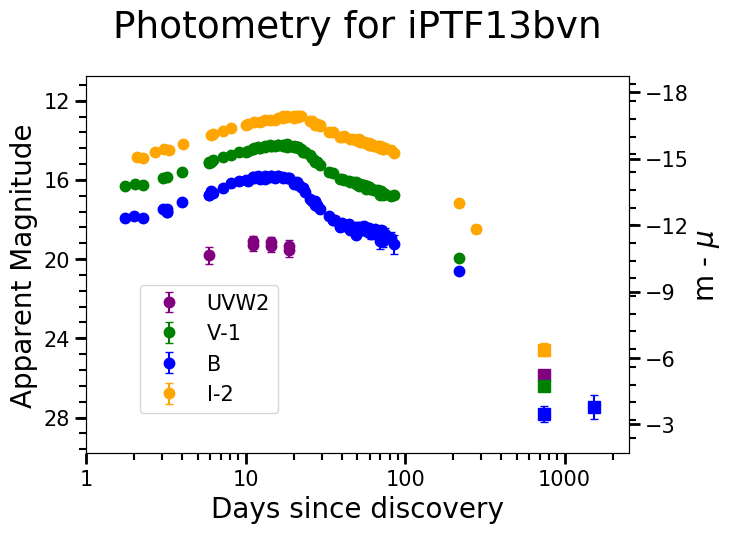

In [6]:
#evaluate the function above; input early time data, late time data, luminosity distance, and discovery date
plot_photometry_iPTF13bvn(iPTF13bvn,iPTF13bvn_lt,19.94,56459)

In [7]:
#this function follows a similar process as the one for iPTF13bvn
def plot_photometry_SN1993J(data, data_lt, lum_d, date_dsc):
    data.drop(['upperlimit','source'], axis=1)
    data.e_magnitude.fillna(0.1)
    fig, ax_a = plt.subplots(figsize=(7,5),dpi=100)
    ax_b = ax_a.twinx()
    
    newcol = []
    
    for i in data_lt.date_obs:
        newcol.append(Time(i+'T00:00:00.000').mjd)

    data_lt['time'] = newcol
    print(data_lt['time'])

    tmax = np.max([np.max(data.time),np.max(data_lt.time)])
    tmin = np.min([np.min(data.time),np.min(data_lt.time)])
    mmax = np.max([np.max(data.magnitude),np.max(data_lt.m_avg)])
    mmin = np.min([np.min(data.magnitude),np.min(data_lt.m_avg)])
    
    ax_a.set_xscale("log", nonposx='clip')
    ax_a.set_xlim(1,tmax+10000-date_dsc)
    ax_a.set_ylim(mmax+2,mmin-8)
    ax_b.set_ylim(mmax - (5*np.log10(lum_d*(10**6)/10.)), mmin-8- (5*np.log10(lum_d*(10**6)/10.)))
    
    U = data[data.band == 'U']
    B = data[data.band == 'B']
    V = data[data.band == 'V']
    R = data[data.band == 'R']
    I = data[data.band == 'I']

    ax_a.errorbar(U['time']-date_dsc, U['magnitude'], ms=15, capsize=3, xerr=None, yerr=U['e_magnitude'], fmt = '.', label='U', color='purple')
    ax_a.errorbar(B['time']-date_dsc, B['magnitude']-3, ms=15, capsize=3, xerr=None, yerr=B['e_magnitude'], fmt = '.', label='B-3', color='blue')
    ax_a.errorbar(V['time']-date_dsc, V['magnitude']-4, ms=15, capsize=3, xerr=None, yerr=V['e_magnitude'], fmt = '.', label='V-4', color='green')
    ax_a.errorbar(R['time']-date_dsc, R['magnitude']-5, ms=15, capsize=3, xerr=None, yerr=R['e_magnitude'], fmt = '.', label='R-5', color='red')
    ax_a.errorbar(I['time']-date_dsc, I['magnitude']-7, ms=15, capsize=3, xerr=None, yerr=I['e_magnitude'], fmt = '.', label='I-7', color='orange')
    
    UVM2_lt = data_lt[data_lt.band.isin(['ISM feature','U'])]
    B_lt = data_lt[data_lt.band.isin(['WFPC2 B','Johnson B'])]
    V_lt = data_lt[data_lt.band == 'WFPC2 V']
    R_lt = data_lt[data_lt.band == 'SDSS r']
    I_lt = data_lt[data_lt.band == 'WFPC2 wide I']
        
    ax_a.errorbar(UVM2_lt['time']-date_dsc, UVM2_lt['m_avg'], ms=8, capsize=3, xerr=None, yerr=UVM2_lt['sigma_m_avg'], color='purple', fmt = 's', label=None)
    ax_a.errorbar(B_lt['time']-date_dsc, B_lt['m_avg']-3, ms=8, capsize=3, xerr=None, yerr=B_lt['sigma_m_avg'], color='blue', fmt = 's', label=None)
    ax_a.errorbar(V_lt['time']-date_dsc, V_lt['m_avg']-4, ms=8, capsize=3, xerr=None, yerr=V_lt['sigma_m_avg'], color='green', fmt = 's', label=None)
    ax_a.errorbar(R_lt['time']-date_dsc, R_lt['m_avg']-5, ms=8, capsize=3, xerr=None, yerr=R_lt['sigma_m_avg'], color='red', fmt = 's', label=None)
    ax_a.errorbar(I_lt['time']-date_dsc, I_lt['m_avg']-7, ms=8, capsize=3, xerr=None, yerr=I_lt['sigma_m_avg'], color='orange', fmt = 's', label=None)
        
    ax_a.set_xlabel('Days since discovery',fontsize=20)
    ax_a.set_ylabel('Apparent Magnitude', x=2, fontsize=20)
    ax_b.set_ylabel('m - $\mu$',fontsize=20)
    ax_a.set_title('Photometry for %s'%(data['event'][0]), y = 1.08,fontsize=27)
    ax_a.legend(loc='lower left', bbox_to_anchor=(0.08, 0.08),fontsize=15)
  
    ax_a.tick_params(which = 'major', width=2,length=8)
    ax_a.tick_params(which = 'minor', width=1.5,length=5)
    ax_b.tick_params(which = 'major', width=2,length=8)
    ax_b.tick_params(which = 'minor', width=1.5,length=5)  
    
    ax_a.xaxis.set_major_locator(plt.LogLocator())
    ax_a.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
    
    ax_a.yaxis.set_major_locator(plt.MaxNLocator(6))
    ax_a.yaxis.set_minor_locator(plt.MaxNLocator(25))

    ax_b.yaxis.set_major_locator(plt.MaxNLocator(6))
    ax_b.yaxis.set_minor_locator(plt.MaxNLocator(25))
    
    dates1 = np.linspace(tmin,tmax,6)
    dates = dates1.astype(int)-tmin-10
    
    plt.savefig('phot_1993J.png', format='png', dpi=100,bbox_inches = "tight")
    plt.show

0    55921.0
1    57108.0
2    55919.0
3    55919.0
4    55919.0
5    53263.0
Name: time, dtype: float64


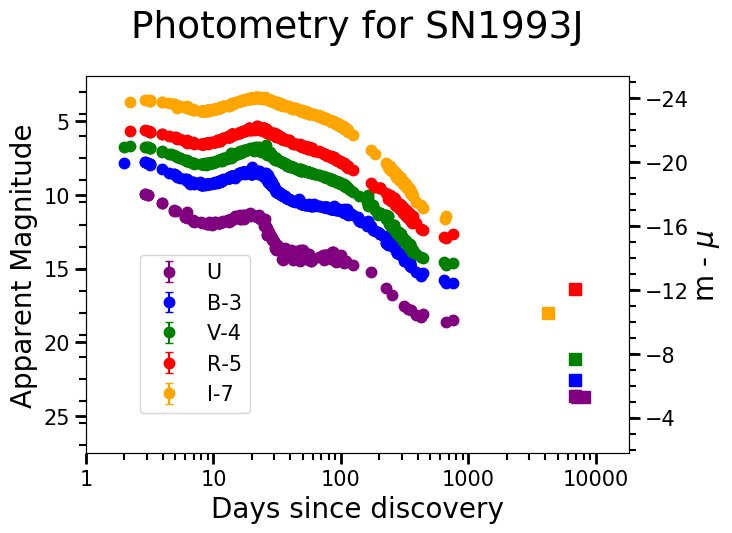

In [8]:
plot_photometry_SN1993J(SN1993J,SN1993J_lt,2.9,49074)

In [9]:
#this function follows a similar process as the one for iPTF13bvn
def plot_photometry_06aj(data, data_lt, lum_d, date_dsc):
    data.drop(['upperlimit','source'], axis=1)
    data = data[data.e_magnitude > 0]
    
    fig, ax_a = plt.subplots(figsize=(7,5),dpi=100)
    ax_b = ax_a.twinx()
    
    newcol = []
    for i in data_lt.date_obs:
        newcol.append(Time(i+'T00:00:00.000').mjd)
    data_lt['time'] = newcol
    print(data_lt['time'])
    
    tmax = np.max([np.max(data.time),np.max(data_lt.time)])
    tmin = np.min([np.min(data.time),np.min(data_lt.time)])
    mmax = np.max([np.max(data.magnitude),np.max(data_lt.m_avg)])
    mmin = np.min([np.min(data.magnitude),np.min(data_lt.m_avg)])

    ax_a.set_xscale("log", nonposx='clip')
    ax_a.set_xlim(0,400)
    ax_a.set_ylim(mmax+1,mmin-3)
    ax_b.set_ylim(mmax+1 - (5*np.log10(lum_d*(10**6)/10.)), mmin-3- (5*np.log10(lum_d*(10**6)/10.)))
    
    r = data[data.band == "r'"]
    B = data[data.band == 'B']
    V = data[data.band == 'V']
    I = data[data.band == "i'"]

    ax_a.errorbar(r['time']-date_dsc, r['magnitude']-2, ms=15, capsize=3, xerr=None, yerr=r['e_magnitude'], fmt = '.', label="r'-2", color='red')
    ax_a.errorbar(B['time']-date_dsc, B['magnitude'], ms=15, capsize=3, xerr=None, yerr=B['e_magnitude'], fmt = '.', label='B', color='blue')
    ax_a.errorbar(V['time']-date_dsc, V['magnitude']-1, ms=15, capsize=3, xerr=None, yerr=V['e_magnitude'], fmt = '.', label='V-1', color='green')
    ax_a.errorbar(I['time']-date_dsc, I['magnitude']-3, ms=15, capsize=3, xerr=None, yerr=I['e_magnitude'], fmt = '.', label="i'-3", color='orange')
        
    B_lt = data_lt[data_lt.band == 'Johnson B']
    V_lt = data_lt[data_lt.band == 'WFPC2 V']
    R_lt = data_lt[data_lt.band == "SDSS r'"]
    I_lt = data_lt[data_lt.band == 'Wfpc 2 Wide I']

    ax_a.errorbar(B_lt['time']-date_dsc, B_lt['m_avg'], ms=8, capsize=3, xerr=None, yerr=B_lt['sigma_m_avg'], color='blue', fmt = 's', label=None)
    ax_a.errorbar(V_lt['time']-date_dsc, V_lt['m_avg']-1, ms=8, capsize=3, xerr=None, yerr=V_lt['sigma_m_avg'], color='green', fmt = 's', label=None)
    ax_a.errorbar(R_lt['time']-date_dsc, R_lt['m_avg']-2, ms=8, capsize=3, xerr=None, yerr=R_lt['sigma_m_avg'], color='red', fmt = 's', label=None)
    ax_a.errorbar(I_lt['time']-date_dsc, I_lt['m_avg']-3, ms=8, capsize=3, xerr=None, yerr=I_lt['sigma_m_avg'], color='orange', fmt = 's', label=None)

    ax_a.set_xlabel('Days since discovery',fontsize=20)
    ax_a.set_ylabel('Apparent Magnitude',x=2,fontsize=20)
    ax_b.set_ylabel('m - $\mu$',fontsize=20)
    ax_a.set_title('Photometry for %s'%(data['event'][2]), y = 1.08,fontsize=27)
    ax_a.legend(loc='lower left', bbox_to_anchor=(0.08, 0.08),fontsize=15)

    ax_a.tick_params(which = 'major', width=2,length=8)
    ax_a.tick_params(which = 'minor', width=1.5,length=5)
    ax_b.tick_params(which = 'major', width=2,length=8)
    ax_b.tick_params(which = 'minor', width=1.5,length=5)
    
    ax_a.xaxis.set_major_locator(plt.LogLocator())
    ax_a.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
    
    ax_a.yaxis.set_major_locator(plt.MaxNLocator(6))
    ax_a.yaxis.set_minor_locator(plt.MaxNLocator(25))

    ax_b.yaxis.set_major_locator(plt.MaxNLocator(6))
    ax_b.yaxis.set_minor_locator(plt.MaxNLocator(25))
    
    dates1 = np.linspace(tmin,tmax,6)
    dates = dates1.astype(int)-tmin-10
    
    plt.savefig('phot_2006aj.png', format='png',dpi=100,bbox_inches = "tight")
    plt.show

0     53964.0
1     53936.0
2     53956.0
3     53934.0
4     54012.0
5     54034.0
6     53964.0
7     54043.0
8     53936.0
9     54012.0
10    53956.0
11    53934.0
12    54012.0
13    54034.0
Name: time, dtype: float64


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


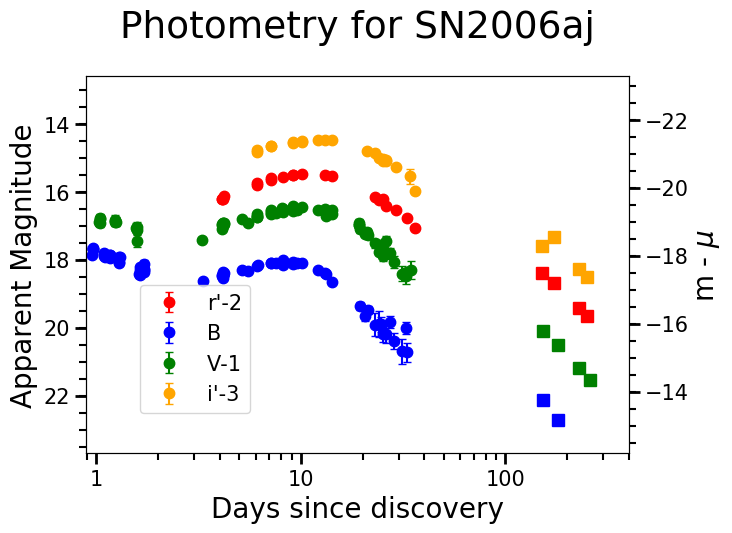

In [10]:
plot_photometry_06aj(SN2006aj,SN2006aj_lt,149.8,53784)